In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
df=pd.read_csv('cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [30]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


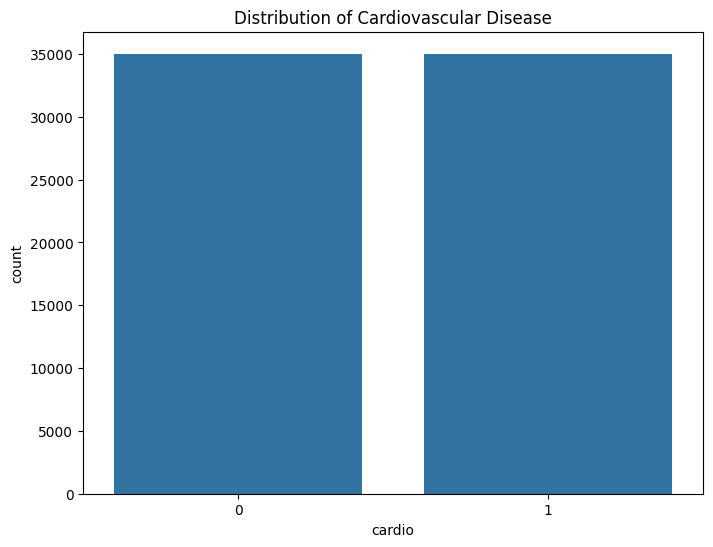

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease')
plt.show()


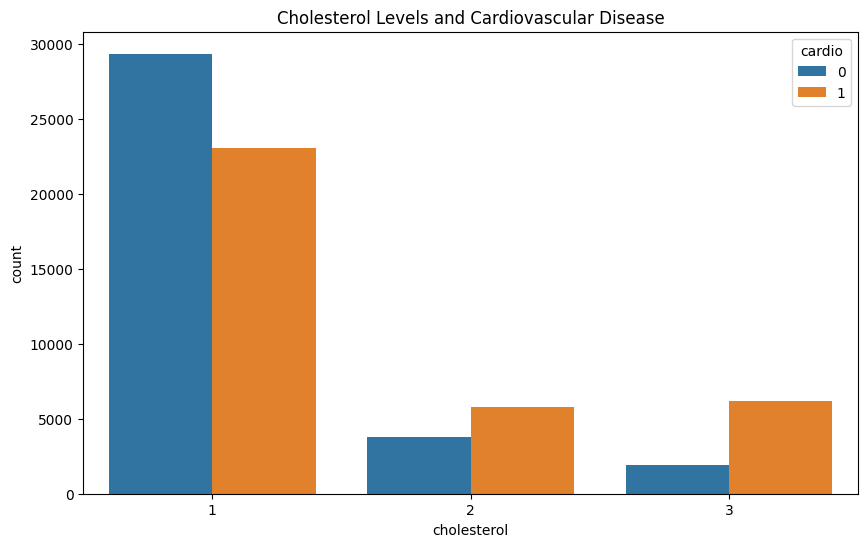

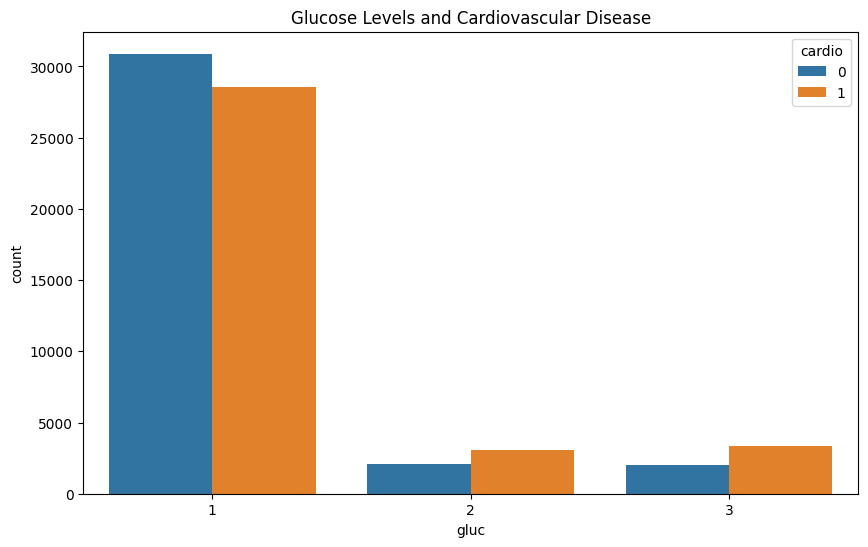

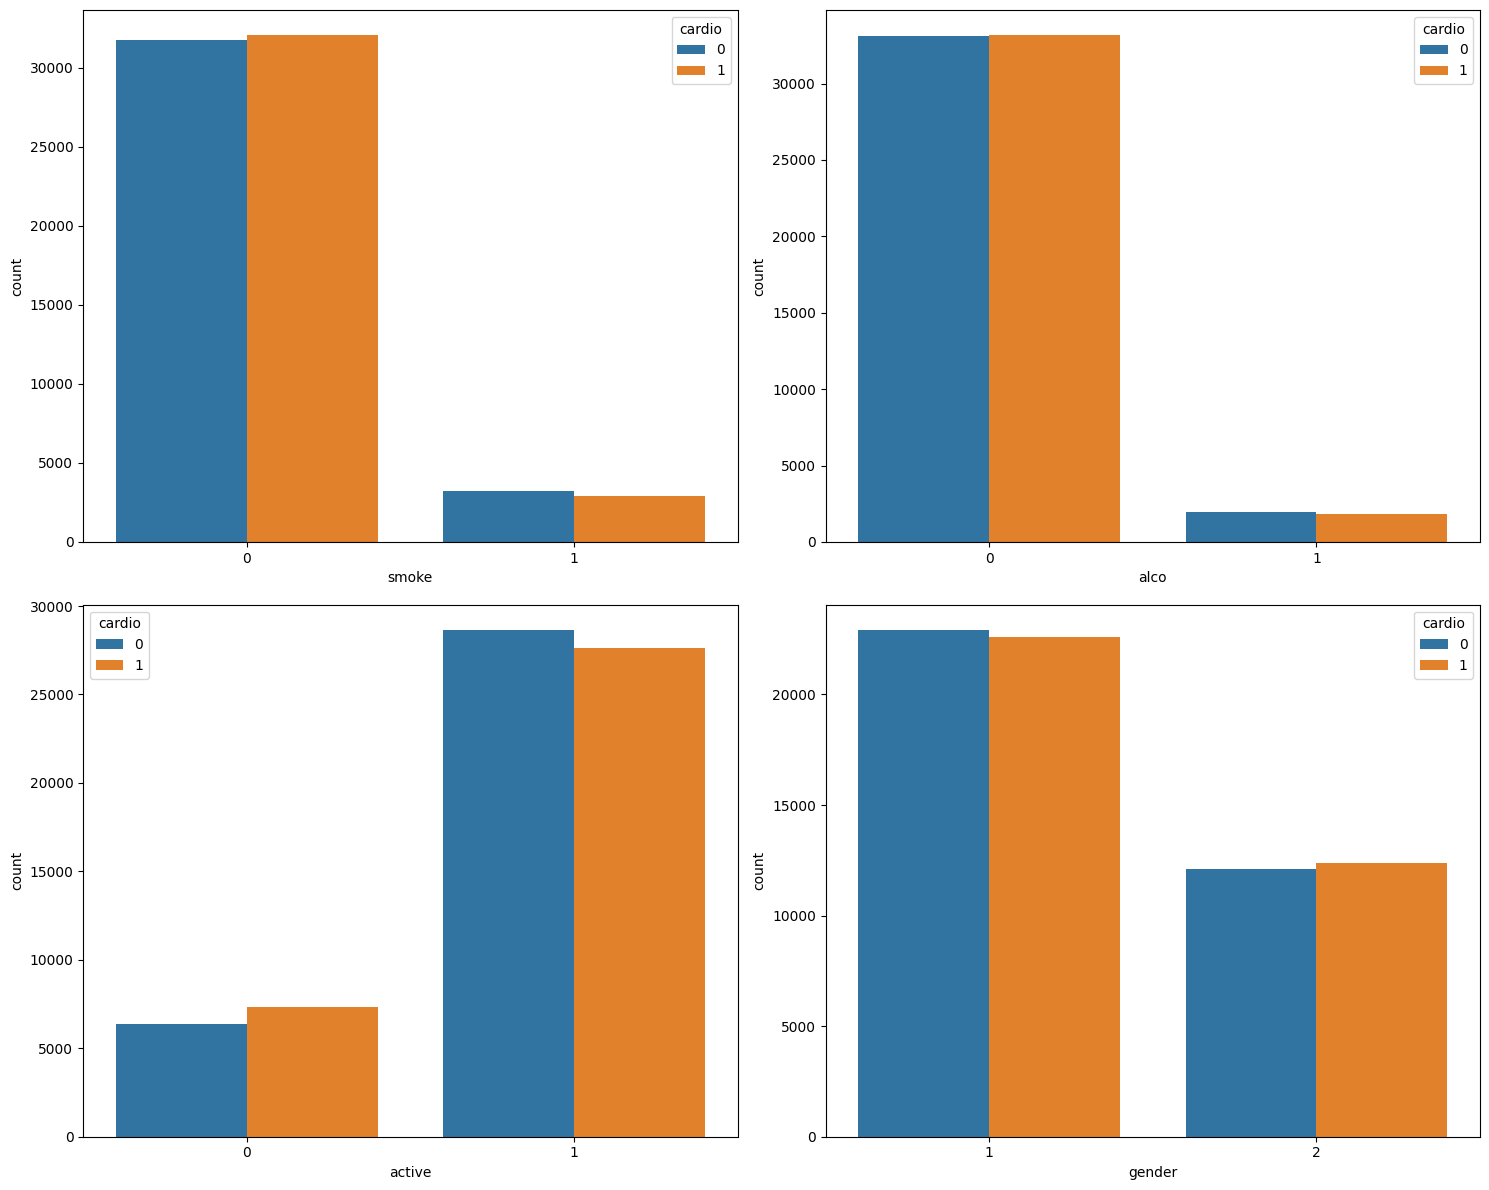

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cholesterol Levels and Cardiovascular Disease')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title('Glucose Levels and Cardiovascular Disease')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(x='smoke', hue='cardio', data=df, ax=axes[0, 0])
sns.countplot(x='alco', hue='cardio', data=df, ax=axes[0, 1])
sns.countplot(x='active', hue='cardio', data=df, ax=axes[1, 0])
sns.countplot(x='gender', hue='cardio', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

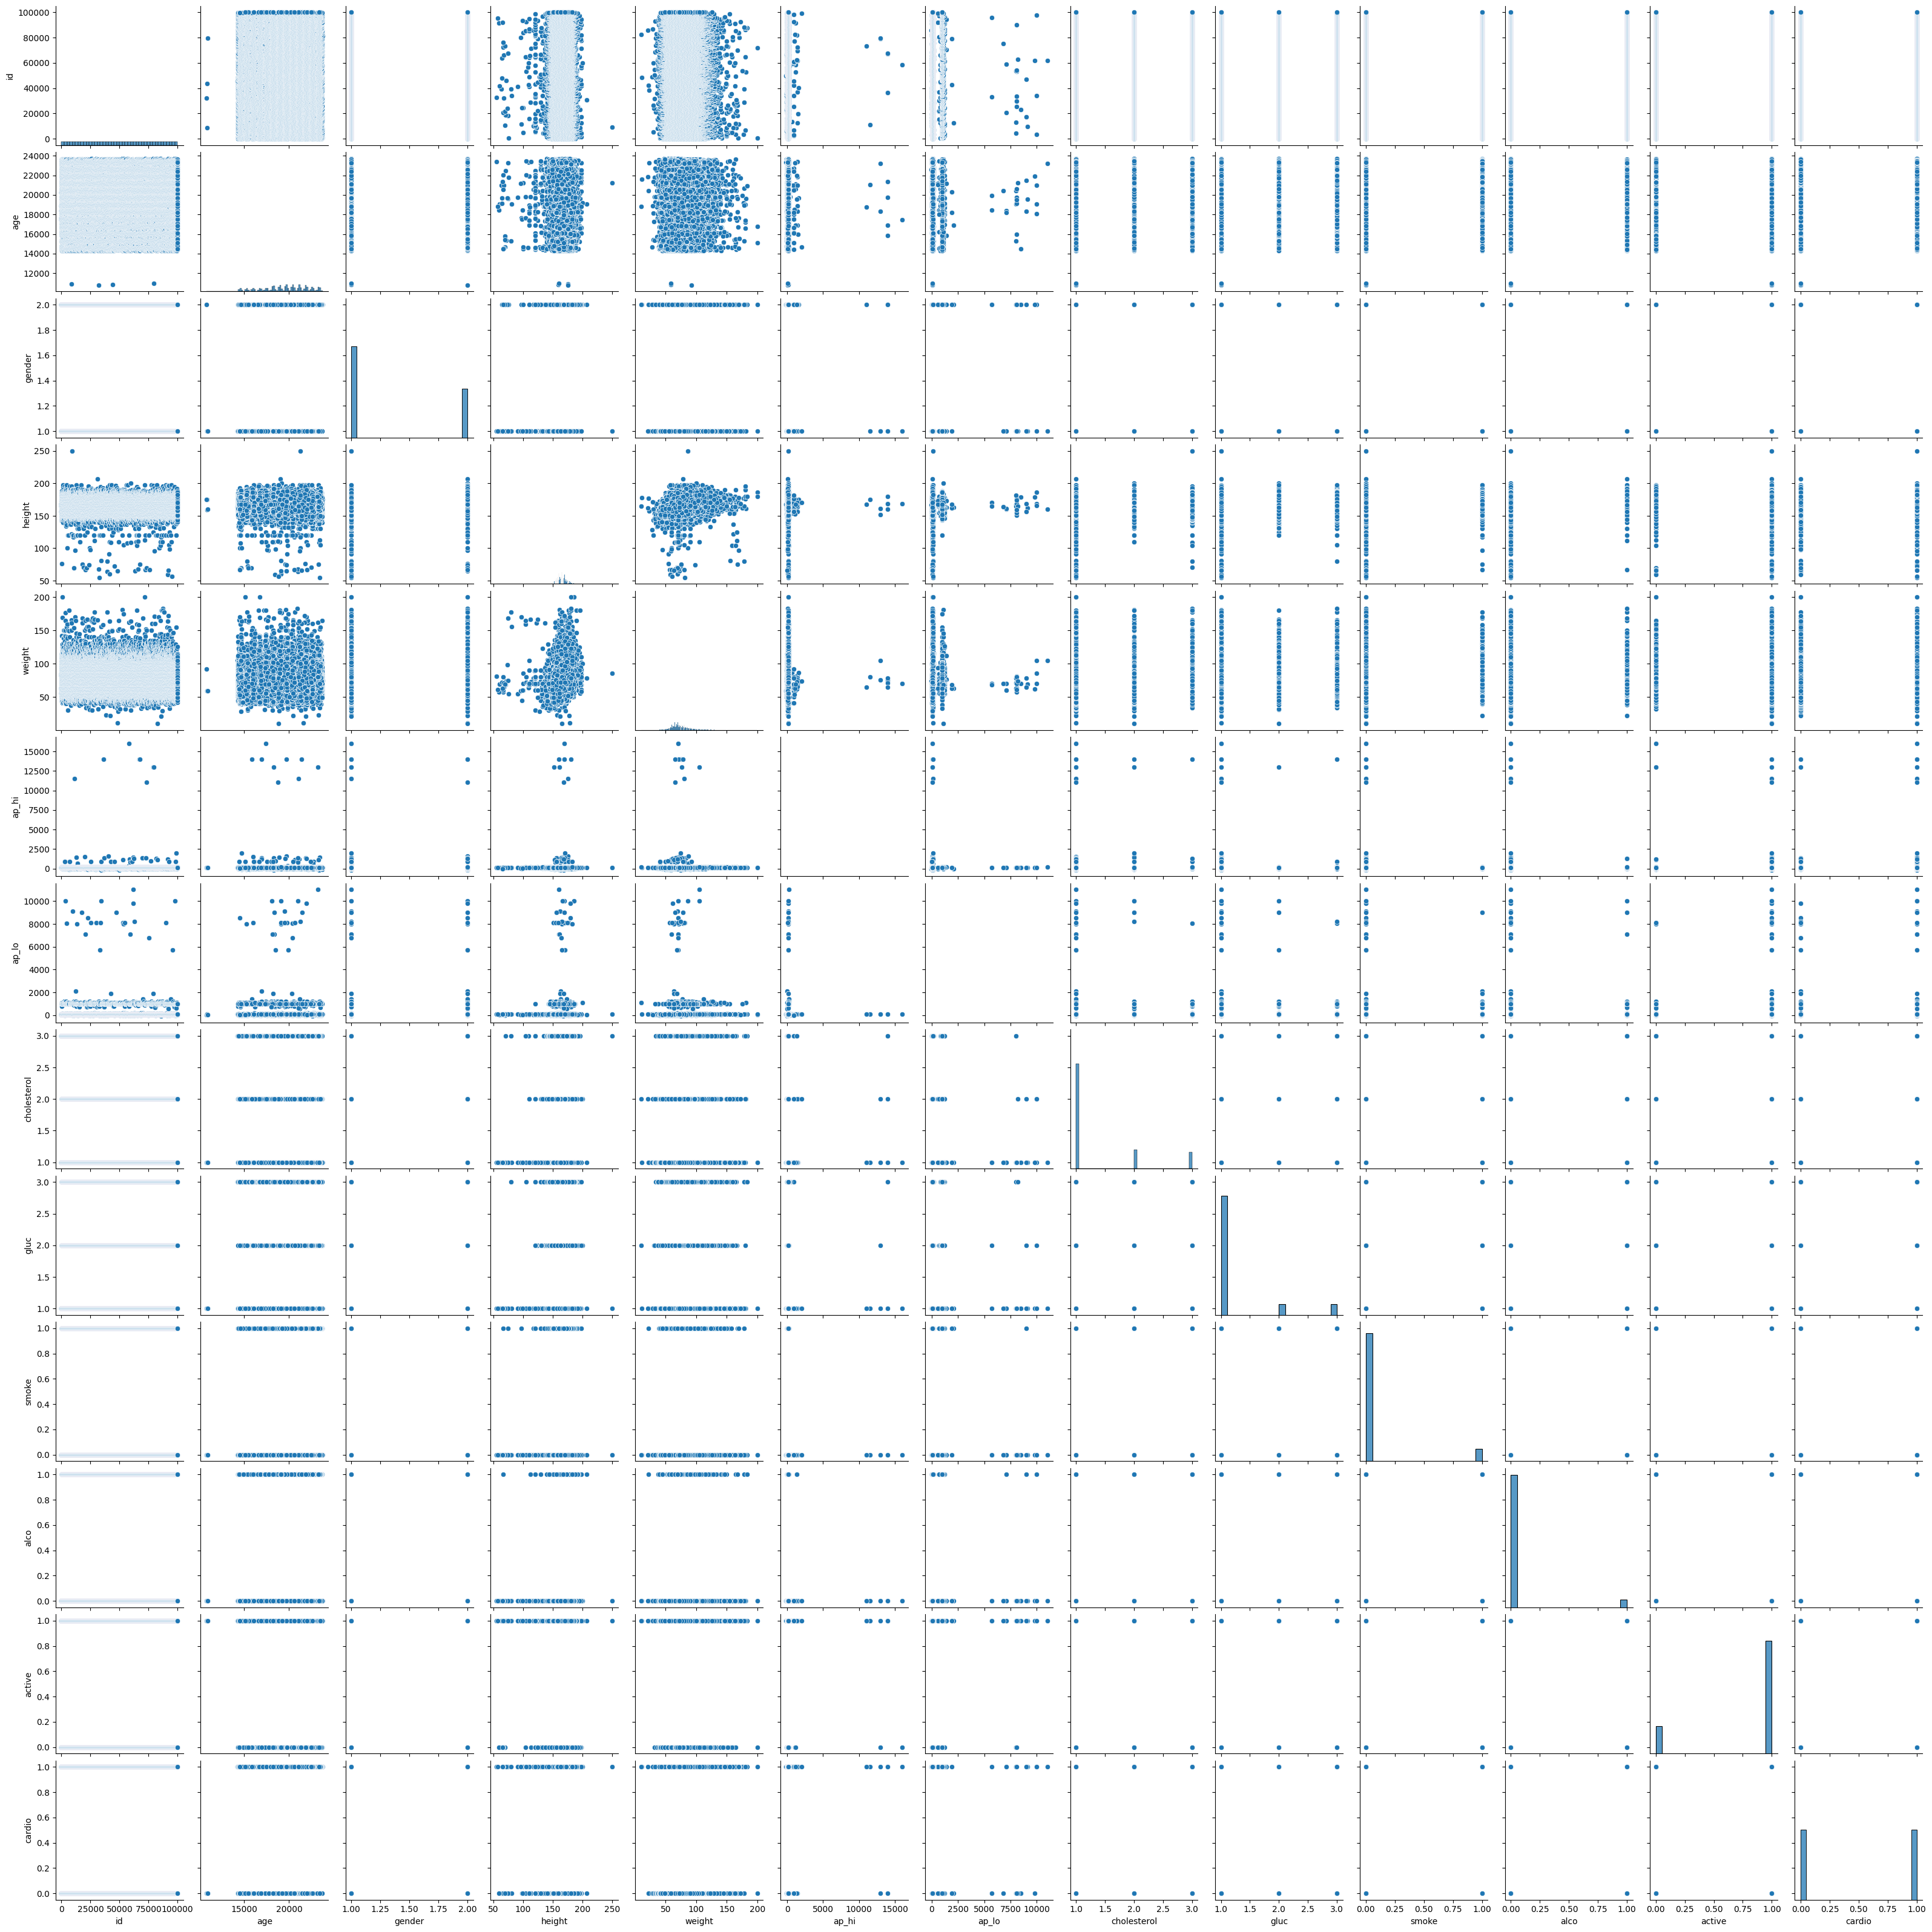

In [51]:
sns.pairplot(df)

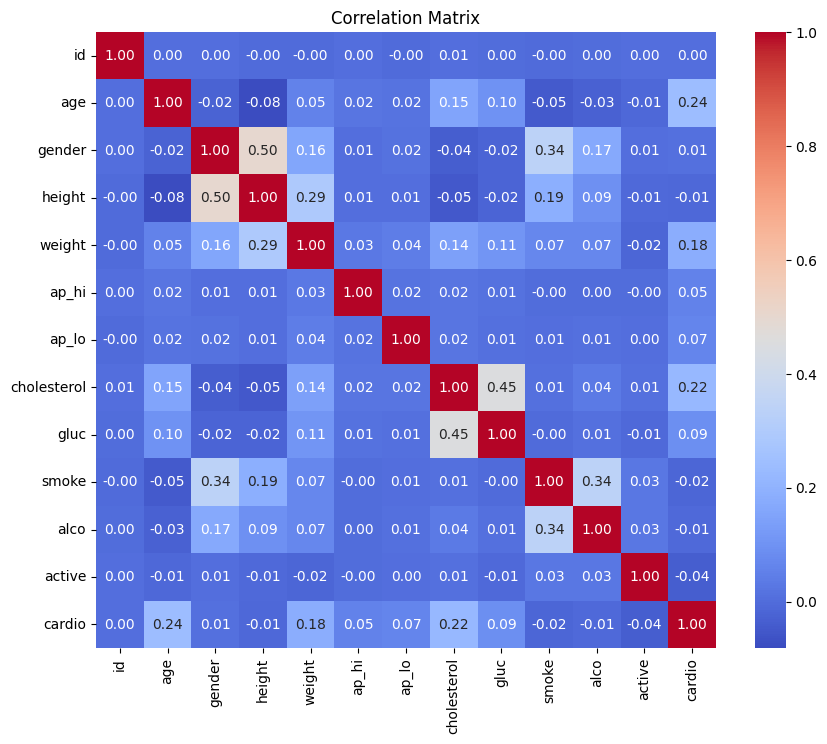

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
key_features=['age', 'height', 'weight', 'ap_hi', 'ap_lo']

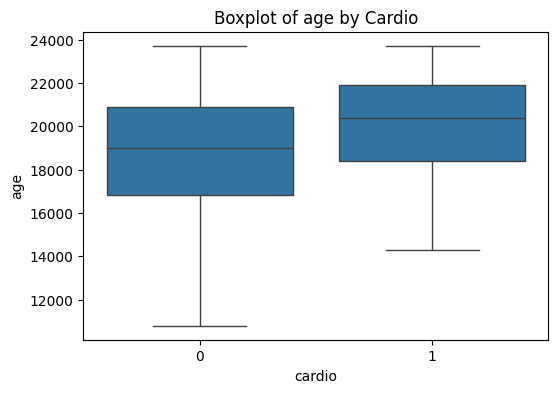

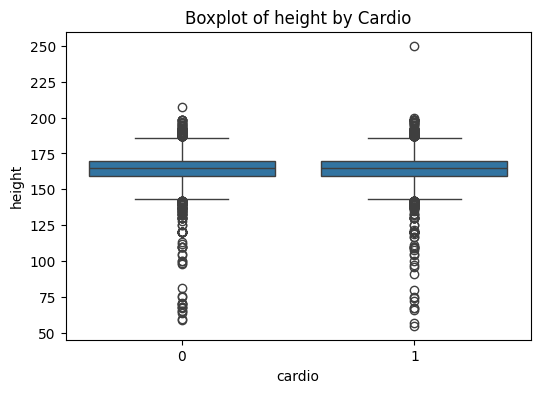

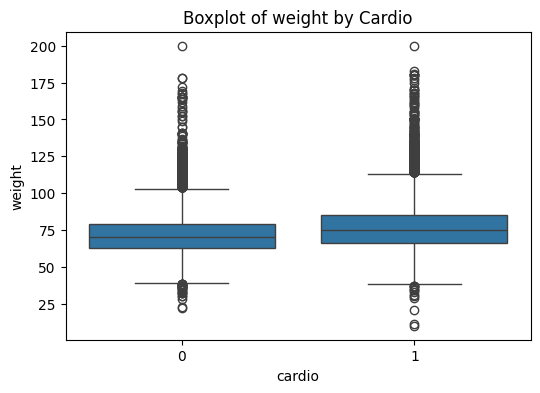

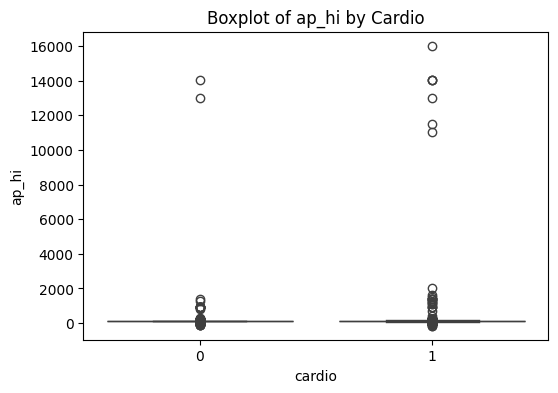

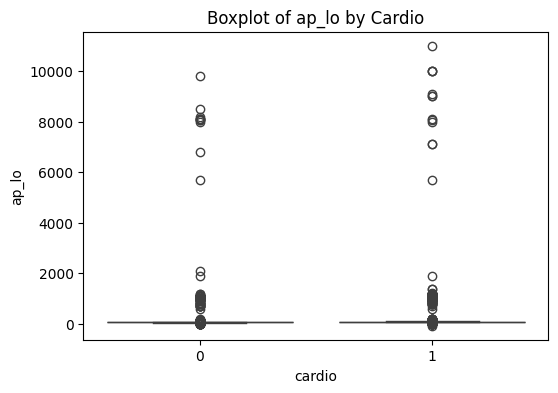

In [35]:
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cardio', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Cardio')
    plt.show()

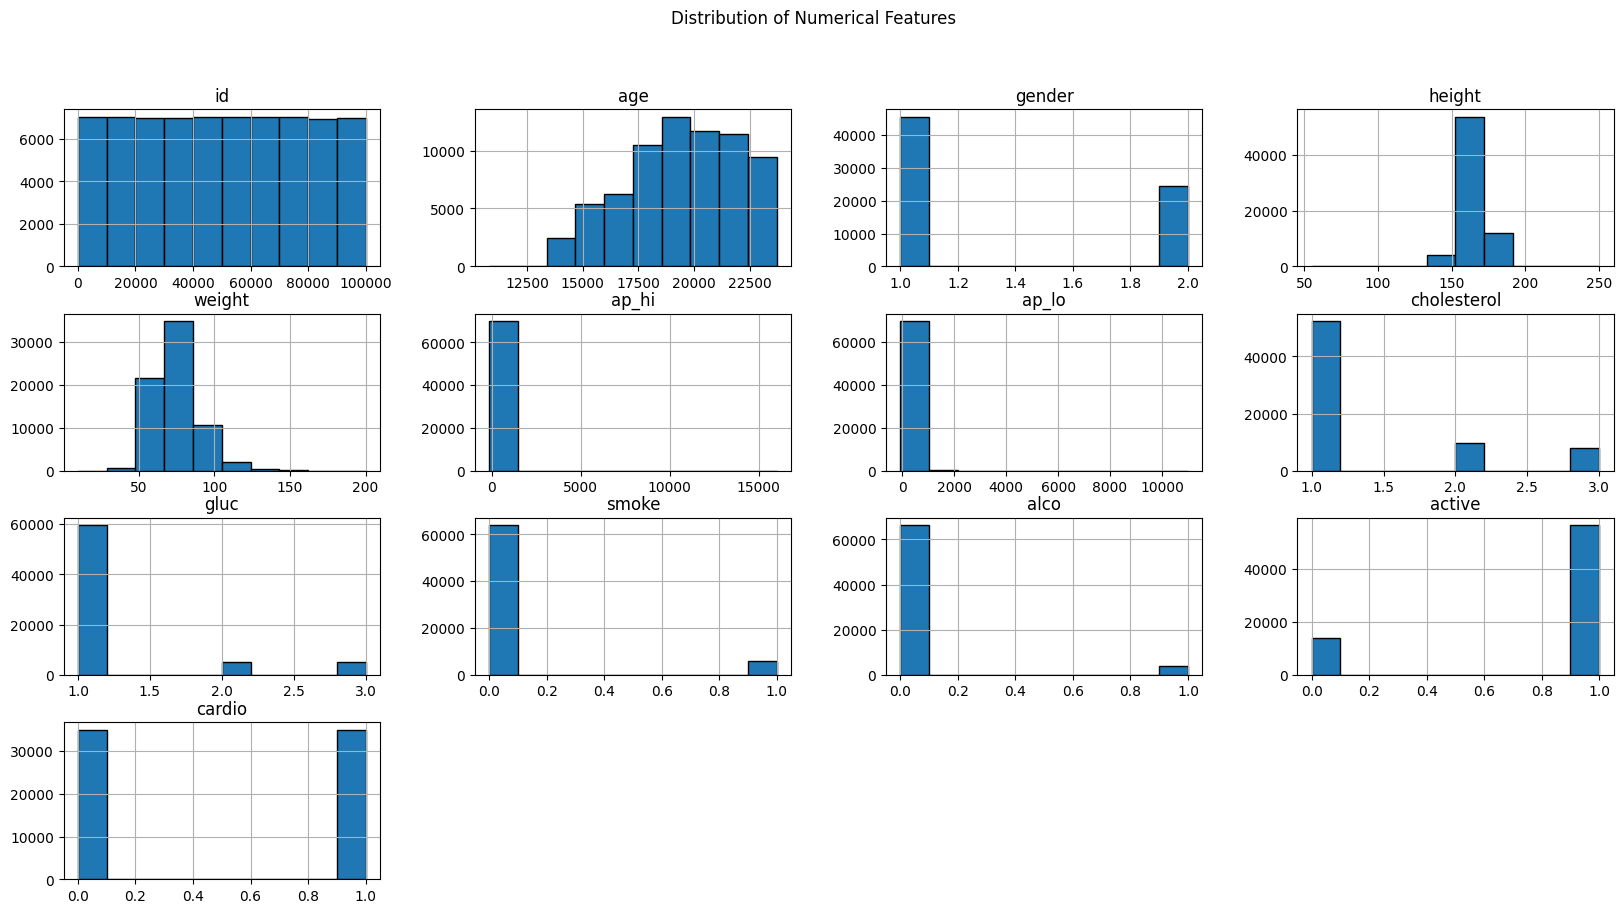

In [36]:
df.hist(figsize=(20, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

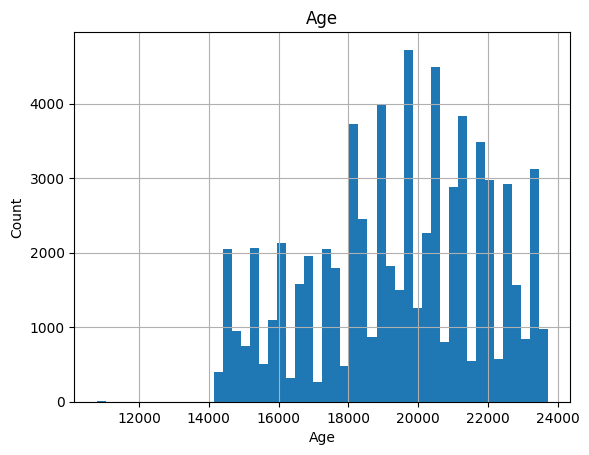

In [37]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

In [38]:
df["age"].head()

,age
0,18393
1,20228
2,18857
3,17623
4,17474


check if target classes are balanced

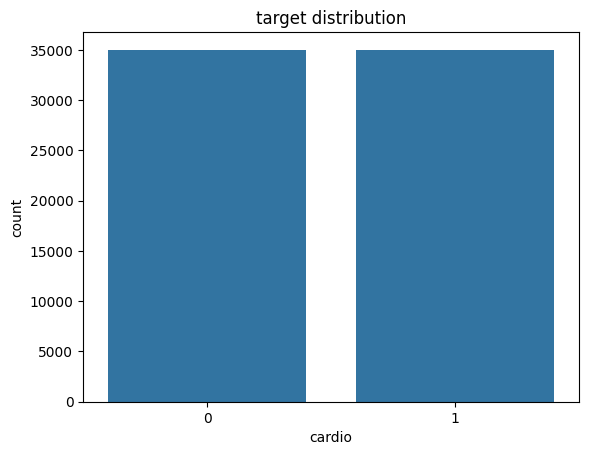

In [39]:
sns.countplot(data=df, x='cardio')
plt.title('target distribution')
plt.show()

# Sorting Feature based on Permutation importance

In [40]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance.importances_mean
})

perm_importance_df = perm_importance_df.sort_values(by='Permutation Importance', ascending=False)
print(perm_importance_df)

        Feature  Permutation Importance
5         ap_hi                0.136400
7   cholesterol                0.035871
1           age                0.025143
6         ap_lo                0.007164
4        weight                0.004950
11       active                0.002729
8          gluc                0.002571
10         alco                0.001321
0            id                0.001000
3        height                0.000493
9         smoke                0.000086
2        gender               -0.000529


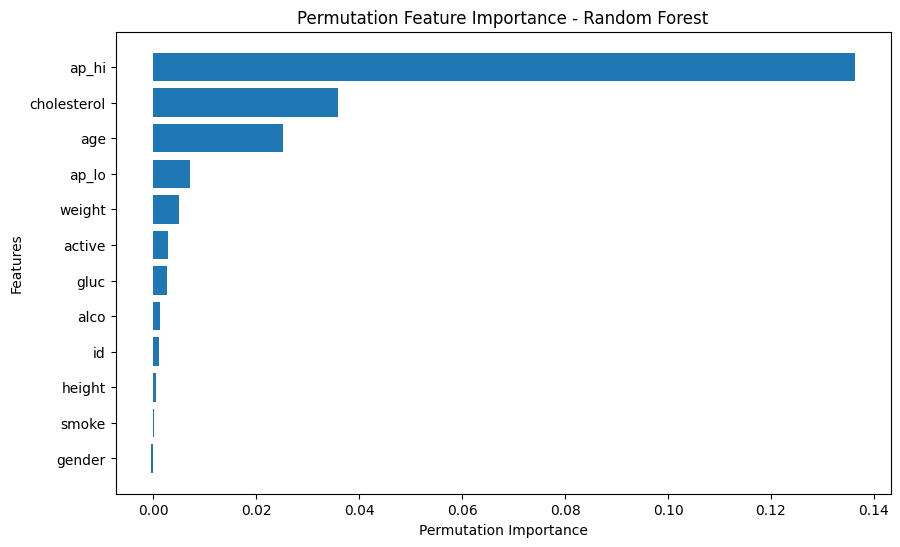

In [44]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - Random Forest")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.show()

# **feature selection**

In [45]:
from sklearn.feature_selection import (
    mutual_info_regression,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)

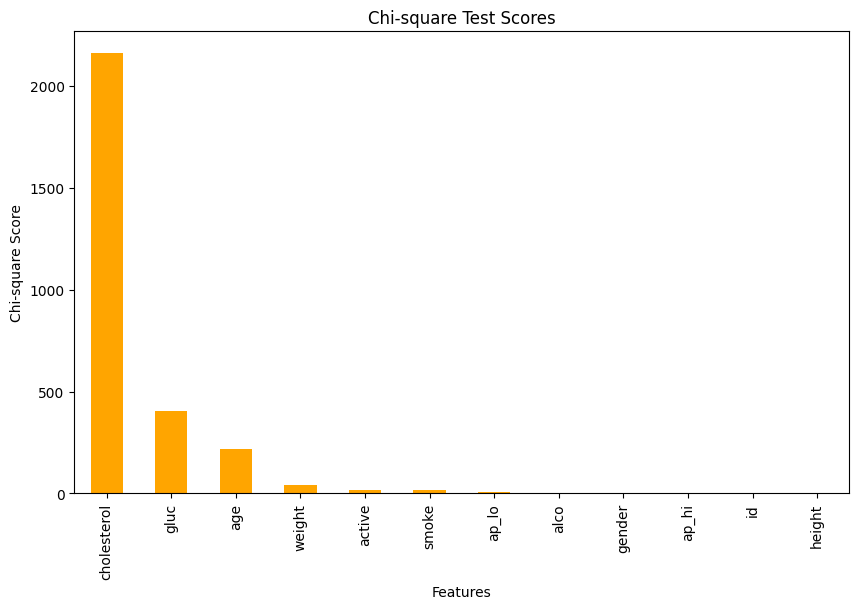

In [46]:
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

# Binarize the target variable for classification
y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

# Compute Chi-square scores
chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=X.columns)
chi2_scores.sort_values(ascending=False, inplace=True)

# Plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

In [47]:
feature_names = X.columns

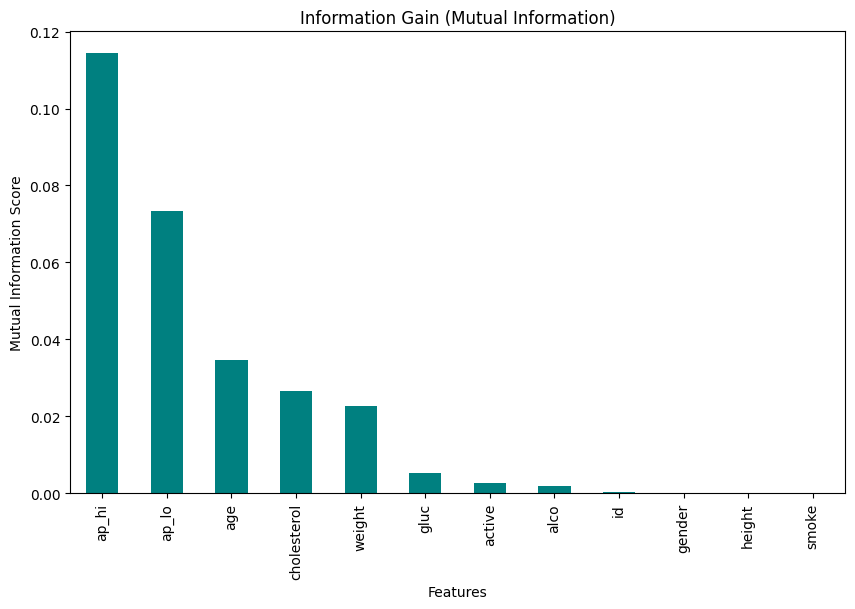

In [48]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)

# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

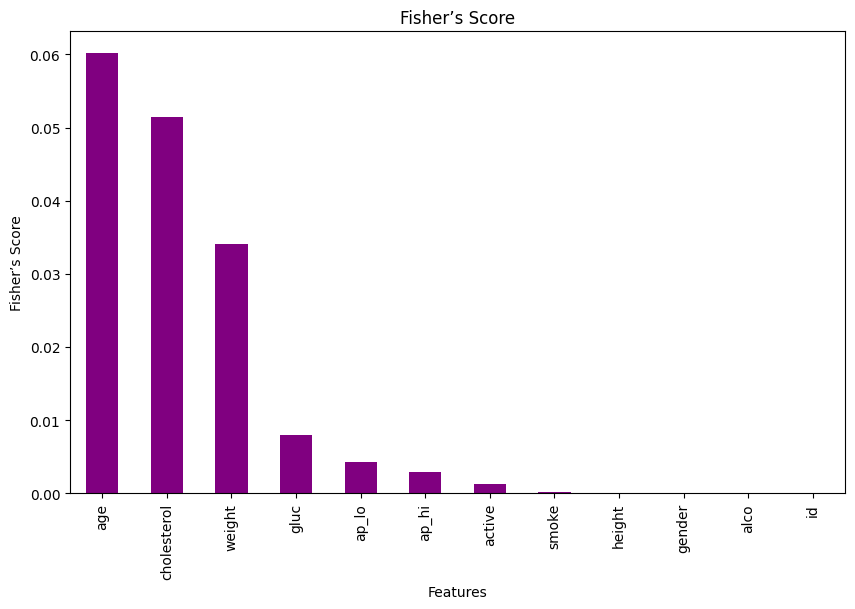

In [49]:
def fisher_score(X, y):
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)
    between_var = np.zeros(X.shape[1])
    within_var = np.zeros(X.shape[1])

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fisher_scores = fisher_score(X_scaled, y_bin)  # Using binarized target
fisher_scores = pd.Series(fisher_scores, index=X.columns)
fisher_scores.sort_values(ascending=False, inplace=True)

# Plot Fisher’s Scores
plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()

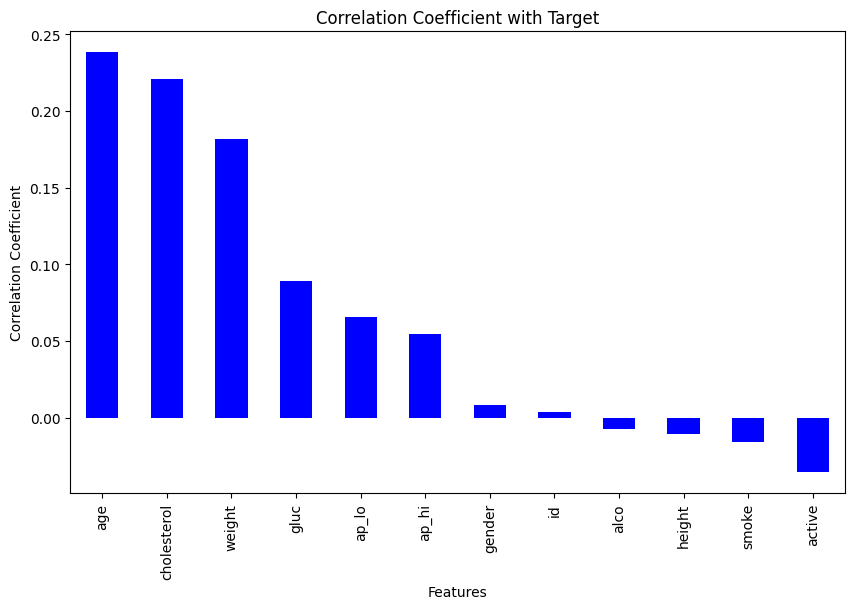

In [50]:
 #correlation with target
corr_scores = np.corrcoef(X.T, y)[-1, :-1]
corr_scores = pd.Series(corr_scores, index=X.columns)

corr_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# Feature Engineering

In [53]:
df['bmi'] = df['weight'] / ((df['height']/100)**2)
df = df[(df['bmi'] >= 15) & (df['bmi'] <= 50)]

In [54]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['hypertension'] = ((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)
df['obesity'] = (df['bmi'] >= 30).astype(int)

df = df.drop(columns=['height', 'weight', 'ap_hi', 'ap_lo'])


<ipython-input-54-d805715d4f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
<ipython-input-54-d805715d4f7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension'] = ((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)
<ipython-input-54-d805715d4f7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h